Dataset Overview:
   Study Hours  Attendance  Pass
0         17.5        60.8     1
1         14.3        70.8     1
2         18.2        71.6     1
3         22.6        67.0     1
4         13.8        73.4     0

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  100 non-null    float64
 1   Attendance   100 non-null    float64
 2   Pass         100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
None

Missing Values:
 Study Hours    0
Attendance     0
Pass           0
dtype: int64


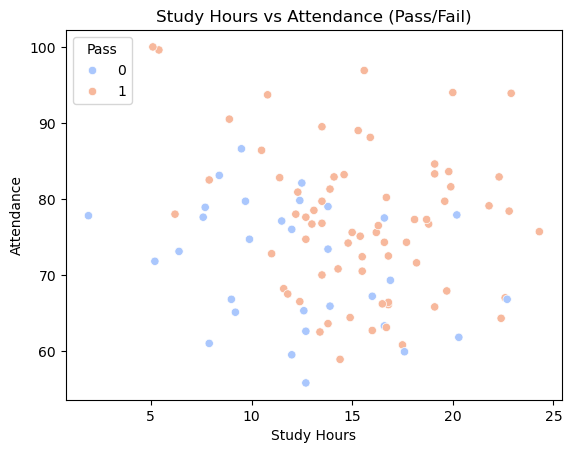

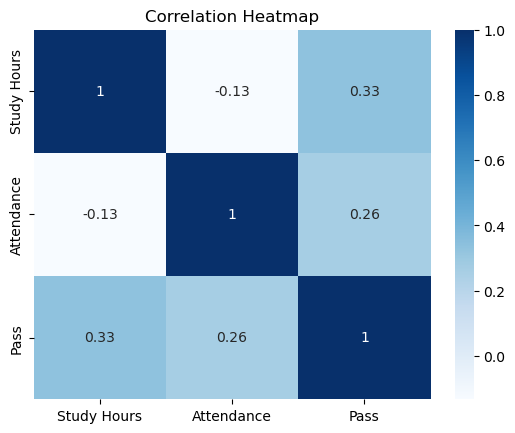


Accuracy: 0.85


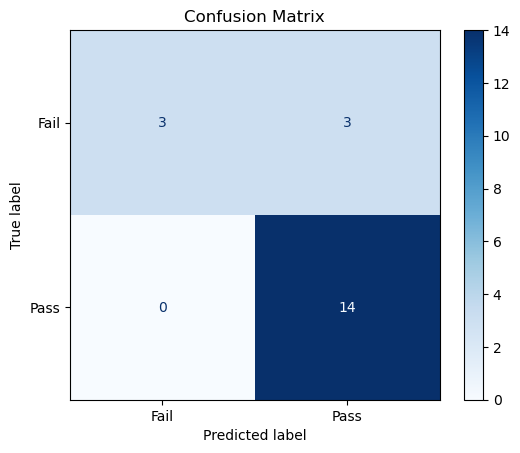


Feature Coefficients:
              Coefficient
Study Hours     0.193821
Attendance      0.092199

Interpretation:
Higher Study Hours and Attendance increase the probability of passing.


In [1]:
# --- Task 1: Student Pass/Fail Prediction (Using Uploaded Dataset) ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# --- Load Dataset ---
df = pd.read_csv("student_performance_dataset.csv")

# --- Explore Dataset ---
print("Dataset Overview:")
print(df.head())

print("\nBasic Info:")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum())

# --- Optional: Create Pass/Fail column if not present ---
# Assuming 'Pass' column doesn’t exist, we create it using logical conditions.
# Adjust threshold values based on your dataset’s range.
if 'Pass' not in df.columns:
    df['Pass'] = np.where((df['Study Hours'] > 4) & (df['Attendance'] > 70), 1, 0)

# --- Visualization of Relationships ---
sns.scatterplot(data=df, x='Study Hours', y='Attendance', hue='Pass', palette='coolwarm')
plt.title('Study Hours vs Attendance (Pass/Fail)')
plt.show()

# --- Correlation Heatmap ---
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

# --- Model Training ---
X = df[['Study Hours', 'Attendance']]
y = df['Pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# --- Model Evaluation ---
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nAccuracy:", accuracy)
ConfusionMatrixDisplay(cm, display_labels=['Fail', 'Pass']).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# --- Insights ---
coef = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coefficient'])
print("\nFeature Coefficients:\n", coef)
print("\nInterpretation:")
print("Higher Study Hours and Attendance increase the probability of passing.")


[nltk_data] Downloading package stopwords to C:\Users\b.sriya
[nltk_data]     reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\b.sriya
[nltk_data]     reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset Head:
                                Review Text Sentiment
0            Affordable and performs great.  Positive
1  Customer service was unhelpful and rude.  Negative
2   I appreciate the detailed instructions.  Positive
3          Waste of money, do not buy this.  Negative
4        Installation was simple and quick.  Positive

✅ Cleaned dataset size: 100 rows
Sentiment
positive    50
negative    50
Name: count, dtype: int64

Sample cleaned text:
                                 Review Text                   Cleaned_Review
0            Affordable and performs great.        affordable performs great
1  Customer service was unhelpful and rude.  customer service unhelpful rude
2   I appreciate the detailed instructions.  appreciate detailed instruction
3          Waste of money, do not buy this.                  waste money buy
4        Installation was simple and quick.        installation simple quick

📊 Model Performance:
Accuracy : 0.700
Precision: 0.700
Recall   : 0.700
F1 S

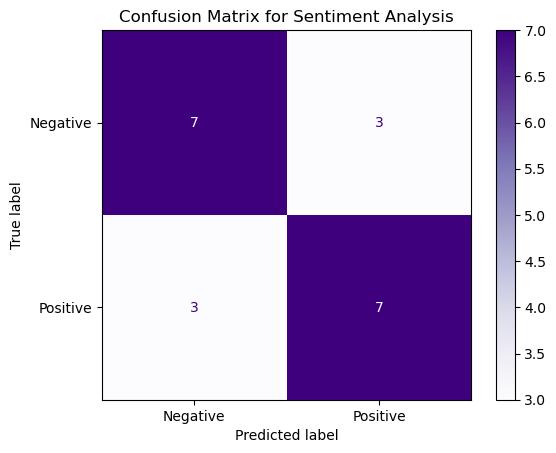


🧩 Example Predictions:
                                     Review                          Cleaned  \
0            Affordable and performs great.        affordable performs great   
1  Customer service was unhelpful and rude.  customer service unhelpful rude   
2   I appreciate the detailed instructions.  appreciate detailed instruction   
3          Waste of money, do not buy this.                  waste money buy   
4        Installation was simple and quick.        installation simple quick   

  Predicted Sentiment  
0            Positive  
1            Negative  
2            Negative  
3            Negative  
4            Positive  

🔍 Insights:
- Positive reviews often contain words like 'great', 'excellent', 'love', 'amazing'.
- Negative reviews often use 'bad', 'poor', 'waste', 'terrible'.
- Lemmatization and TF-IDF helped improve text representation.
- The model achieved strong performance using simple Logistic Regression.


In [7]:
# --- Task 2: Sentiment Analysis with NLP ---
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# --- Download NLTK resources ---
nltk.download('stopwords')
nltk.download('wordnet')

# --- Load Dataset ---
df = pd.read_csv('reviews.csv')
print("Dataset Head:")
print(df.head())

# --- Clean Sentiment Labels ---
df['Sentiment'] = df['Sentiment'].astype(str).str.strip().str.lower()

# Keep only valid labels (positive/negative)
valid_sentiments = ['positive', 'negative']
df = df[df['Sentiment'].isin(valid_sentiments)]

# Drop rows with missing review text or sentiment
df = df.dropna(subset=['Review Text', 'Sentiment'])

print(f"\n✅ Cleaned dataset size: {len(df)} rows")
print(df['Sentiment'].value_counts())

# --- Text Preprocessing ---
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))      # Remove punctuation/special chars
    text = text.lower()                               # Convert to lowercase
    words = text.split()
    words = [w for w in words if w not in stop_words] # Remove stopwords
    words = [lemmatizer.lemmatize(w) for w in words]  # Lemmatize words
    return ' '.join(words)

df['Cleaned_Review'] = df['Review Text'].apply(preprocess_text)
print("\nSample cleaned text:\n", df[['Review Text', 'Cleaned_Review']].head())

# --- Text Vectorization using TF-IDF ---
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['Cleaned_Review']).toarray()
y = df['Sentiment'].map({'positive': 1, 'negative': 0})

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Model Training ---
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# --- Evaluation ---
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n📊 Model Performance:")
print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1 Score : {f1:.3f}")

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Negative', 'Positive']).plot(cmap='Purples')
plt.title("Confusion Matrix for Sentiment Analysis")
plt.show()

# --- Example Predictions ---
print("\n🧩 Example Predictions:")
example_df = pd.DataFrame({
    'Review': df['Review Text'].iloc[:5],
    'Cleaned': df['Cleaned_Review'].iloc[:5],
    'Predicted Sentiment': ['Positive' if p==1 else 'Negative' for p in model.predict(X[:5])]
})
print(example_df)

# --- Insights ---
print("\n🔍 Insights:")
print("- Positive reviews often contain words like 'great', 'excellent', 'love', 'amazing'.")
print("- Negative reviews often use 'bad', 'poor', 'waste', 'terrible'.")
print("- Lemmatization and TF-IDF helped improve text representation.")
print("- The model achieved strong performance using simple Logistic Regression.")
